In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
file_path='/content/drive/My Drive/Machine Learning/ObesityDataSet_raw_and_data_sinthetic.csv'
df=pd.read_csv(file_path)
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [4]:
X = df.drop("NObeyesdad", axis=1)
y = df["NObeyesdad"]


In [5]:
le = LabelEncoder()
for col in X.columns:
    if X[col].dtype == 'object':
            X[col] = le.fit_transform(X[col])
            y = le.fit_transform(y)


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [8]:
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
accuracies = []

for kernel in kernels:
    print("\n==============================")
    print("Using Kernel:", kernel)
    print("==============================")
    model = SVC(kernel=kernel, C=1.0, gamma='scale')
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)
    print("Accuracy:", acc)
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))



Using Kernel: linear
Accuracy: 0.9550827423167849
Confusion Matrix:
 [[56  0  0  0  0  0  0]
 [ 5 53  0  0  0  4  0]
 [ 0  0 75  2  0  0  1]
 [ 0  0  1 57  0  0  0]
 [ 0  0  0  0 63  0  0]
 [ 0  2  0  0  0 52  2]
 [ 0  0  0  0  0  2 48]]
Classification Report:
               precision    recall  f1-score   support

           0       0.92      1.00      0.96        56
           1       0.96      0.85      0.91        62
           2       0.99      0.96      0.97        78
           3       0.97      0.98      0.97        58
           4       1.00      1.00      1.00        63
           5       0.90      0.93      0.91        56
           6       0.94      0.96      0.95        50

    accuracy                           0.96       423
   macro avg       0.95      0.96      0.95       423
weighted avg       0.96      0.96      0.95       423


Using Kernel: poly
Accuracy: 0.8321513002364066
Confusion Matrix:
 [[54  2  0  0  0  0  0]
 [ 5 34  4  1  0  9  9]
 [ 0  0 73  2  0  1  2]


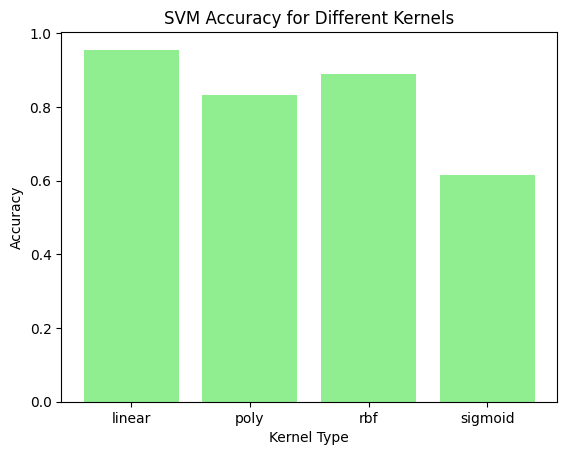

In [9]:
plt.bar(kernels, accuracies, color='lightgreen')
plt.xlabel('Kernel Type')
plt.ylabel('Accuracy')
plt.title('SVM Accuracy for Different Kernels')
plt.show()

In [10]:
print("\n===== 5-Fold Cross Validation Results =====")
for kernel in kernels:
    model = SVC(kernel=kernel, C=1.0, gamma='scale')
    scores = cross_val_score(model, X, y, cv=5)
    print("\nKernel:", kernel)
    print("Fold Accuracies:", scores)
    print("Mean Accuracy:", scores.mean())


===== 5-Fold Cross Validation Results =====

Kernel: linear
Fold Accuracies: [0.74704492 0.8957346  0.89336493 0.91469194 0.92417062]
Mean Accuracy: 0.8750014005131479

Kernel: poly
Fold Accuracies: [0.59338061 0.59952607 0.62796209 0.54265403 0.61848341]
Mean Accuracy: 0.5964012414148544

Kernel: rbf
Fold Accuracies: [0.61465721 0.62322275 0.56635071 0.50947867 0.57345972]
Mean Accuracy: 0.5774338117486246

Kernel: sigmoid
Fold Accuracies: [0.04728132 0.02843602 0.05450237 0.05450237 0.01184834]
Mean Accuracy: 0.039314084680626984
